# AMOC diagnostics: TO DO? See /glade/u/home/dafydd/NGC_AMOC_draft_figures for code
This notebook takes the output from the runs set up in notebook `4_`...`.ipynb` and presents multiple diagnostics used in our analysis.

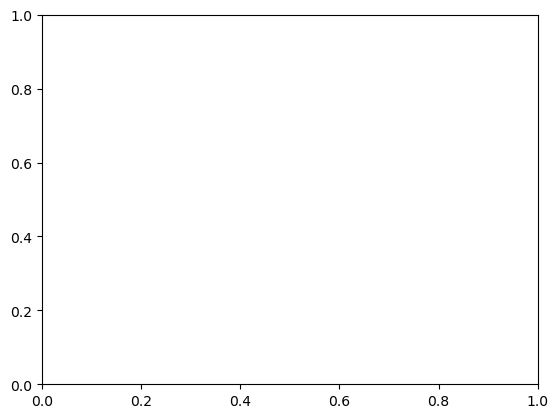

In [1]:
#### %%time
from DPC_functions import *
import scipy.signal as sig 
import matplotlib.dates as mdates

# Figures 1 and 2

In [3]:
# Load the data: leading COF, OOF and EOF for heat flux

# forcingdir='/where/you/downloaded/ECCO/files/other/flux-forced/forcing/'
forcingdir='/glade/work/dafydd/ECCOv4r4_input/other/flux-forced/forcing/'

#adjoint_output_location=/parent/directory/to/your/ECCO/adjoint/runs/
adjoint_output_location='/glade/work/dafydd/PLEIADES_OUTPUT/'

EOF1_hflux=np.load(forcingdir+'hflux_eigenvectors.npy')[:,-1]
hflux_V   =np.load(forcingdir+'hflux_eigenvalues.npy')

EOF1_tauxy=np.load(forcingdir+'tauxy_eigenvectors.npy')[:,-1]
tauxy_V   =np.load(forcingdir+'tauxy_eigenvalues.npy')

SO55_hflux =np.load(adjoint_output_location+'SO55_hflux.npy')[:,-1]
SO55_tauxy =np.load(adjoint_output_location+'SO55_tauxy.npy')[:,-1]

SO25_hflux =np.load(adjoint_output_location+'SO25_hflux.npy')[:,-1]
SO25_tauxy =np.load(adjoint_output_location+'SO25_tauxy.npy')[:,-1]

DPC55_hflux=np.load(adjoint_output_location+'DPC55_hflux.npy')[:,-1]
EDF55_hflux=np.load(adjoint_output_location+'EDF55_hflux.npy')[:,-1]
EDF55_hflux=EDF55_hflux/np.linalg.norm(EDF55_hflux)

DPC25_hflux=np.load(adjoint_output_location+'DPC25_hflux.npy')[:,-1]
EDF25_hflux=np.load(adjoint_output_location+'EDF25_hflux.npy')[:,-1]
EDF25_hflux=EDF25_hflux/np.linalg.norm(EDF25_hflux)

DPC55_tauxy=np.load(adjoint_output_location+'DPC55_tauxy.npy')[:,-1]
EDF55_tauxy=np.load(adjoint_output_location+'EDF55_tauxy.npy')[:,-1]
EDF55_tauxy=EDF55_tauxy/np.linalg.norm(EDF55_tauxy)

DPC25_tauxy=np.load(adjoint_output_location+'DPC25_tauxy.npy')[:,-1]
EDF25_tauxy=np.load(adjoint_output_location+'EDF25_tauxy.npy')[:,-1]
EDF25_tauxy=EDF25_tauxy/np.linalg.norm(EDF25_tauxy)

/glade/derecho/scratch/dafydd/tmp/ipykernel_25922/2419934397.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  CMAP=plt.cm.get_cmap('RdBu_r').__copy__();CMAP.set_bad('k')


Figure 1
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
Figure 2
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)


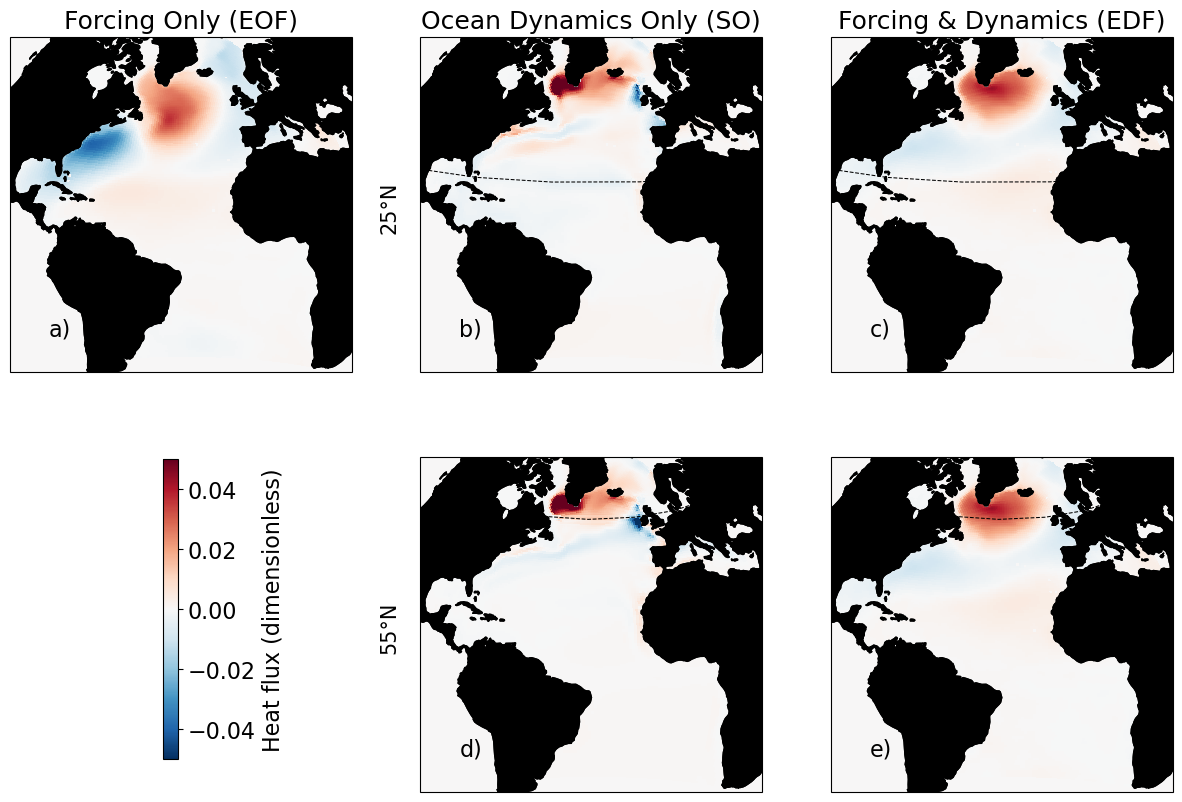

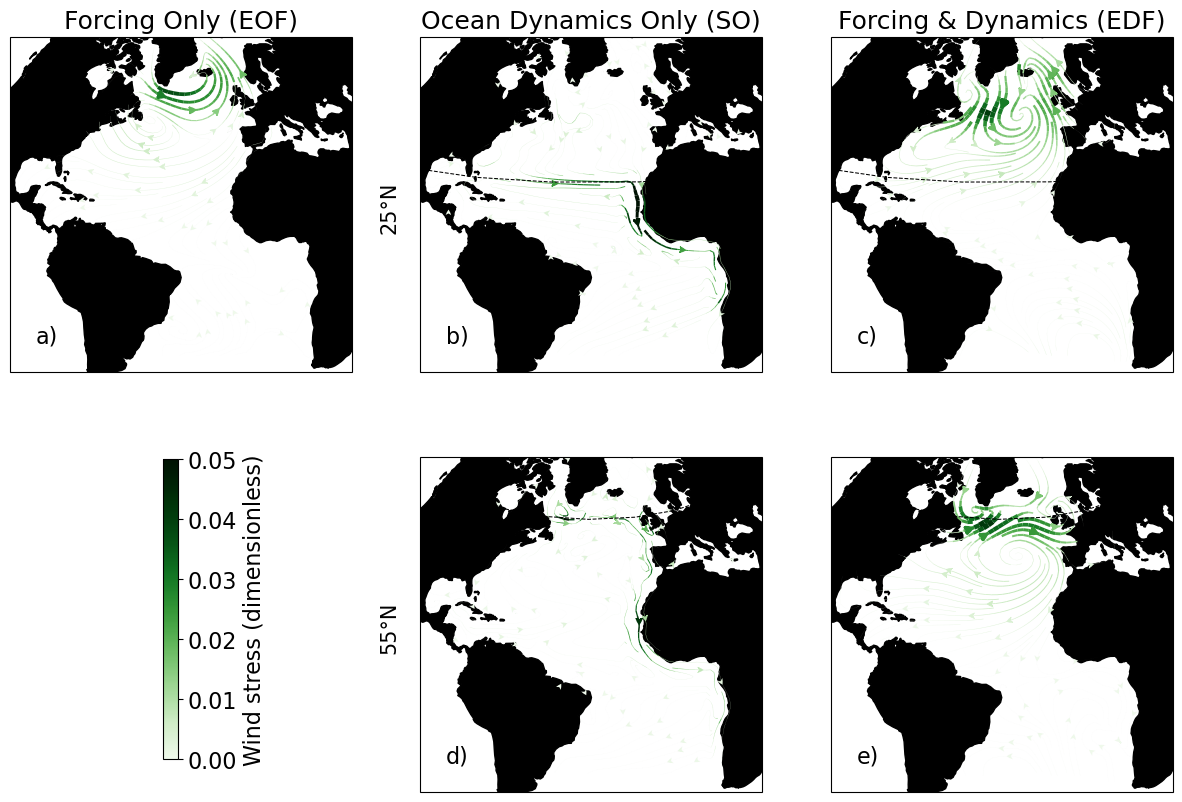

In [5]:
CMAP=plt.cm.get_cmap('RdBu_r').__copy__();CMAP.set_bad('k')
VLIM=0.05
midcolor=CMAP(np.linspace(0,1,256))[128]

print('Figure 1')
fig,ax=plt.subplots(2,3)
# HF EOF1
p,AX=unpack_and_map(EOF1_hflux,ax=ax[0,0],vmin=-VLIM,vmax=VLIM,cmap=CMAP);ax[0,0]=AX;
# HF SOs
p,AX=unpack_and_map(SO25_hflux,ax=ax[0,1],vmin=-VLIM,vmax=VLIM,cmap=CMAP);ax[0,1]=AX;
AX.plot([-100,100],[25,25],transform=ccrs.PlateCarree(),color='k',linestyle='--',linewidth=0.75);
p,AX=unpack_and_map(-SO55_hflux,ax=ax[1,1],vmin=-VLIM,vmax=VLIM,cmap=CMAP);ax[1,1]=AX;
AX.plot([-100,100],[55,55],transform=ccrs.PlateCarree(),color='k',linestyle='--',linewidth=0.75);
# HF EDFs
p,AX=unpack_and_map(EDF25_hflux,ax=ax[0,2],vmin=-VLIM,vmax=VLIM,cmap=CMAP);ax[0,2]=AX;
AX.plot([-100,100],[25,25],transform=ccrs.PlateCarree(),color='k',linestyle='--',linewidth=0.75);
p,AX=unpack_and_map(EDF25_hflux,ax=ax[1,2],vmin=-VLIM,vmax=VLIM,cmap=CMAP);ax[1,2]=AX;
AX.plot([-100,100],[55,55],transform=ccrs.PlateCarree(),color='k',linestyle='--',linewidth=0.75);

ax[1,0].remove()
# cbax1=fig.add_axes([0.2,0.5,0.1,0.175])
cbax1=fig.add_axes([0.125,0.15,0.12,0.3]);
cb=fig.colorbar(p,ax=cbax1);
cb.ax.set_ylabel('Heat flux (dimensionless)',fontsize=16);
# cb.ax.set_ylabel('HELLO',fontsize=12);
cb.ax.tick_params(labelsize=16);
cbax1.set_visible(False);
####

ax[0,0].set_title('Forcing Only (EOF)',fontsize=18);
ax[0,1].set_title('Ocean Dynamics Only (SO)',fontsize=18);
ax[0,2].set_title('Forcing & Dynamics (EDF)',fontsize=18);
ax[0,1].text(-8e6,1e6,'25°N',rotation=90,fontsize=15);
ax[1,1].text(-8e6,1e6,'55°N',rotation=90,fontsize=15);
[ax.flatten()[i].text(-5e6,-3e6,['a)','b)','c)','_','d)','e)'][i],fontsize=16) for i in range(len(ax.flatten()))];
[ax.flatten()[i].set_facecolor(midcolor) for i in range(len(ax.flatten()))]
fig.set_size_inches(15,10);

#
fig.savefig('figures/figure_1.png',bbox_inches='tight')
#####################################################################################################################################
###############################################
#Sharpen the colormap
from matplotlib.colors import ListedColormap

# Define the base colormap and the number of colors
base_cmap = plt.get_cmap('Greens')
N = 256  # Number of points in the colormap
colors = base_cmap(np.linspace(0, 1, N))
# midcolor=colors[128]**2
CMAP = ListedColormap(colors**2)
CMAP.set_bad('k')
###############################################
#####################################################################################################################################

print('Figure 2')

fig,ax=plt.subplots(2,3)
# UV EOFs
s,AX=atlstream(-EOF1_tauxy,ax=ax[0,0],widthfactor=4,ss=1,density=4,arrowsize=1.,arrowstyle='fancy',cmap=CMAP,vmin=0,vmax=VLIM);ax[0,0]=AX;
# UV SOs
s,AX=atlstream(SO25_tauxy,ax=ax[0,1],widthfactor=4,ss=1,density=4,arrowsize=1.,arrowstyle='fancy',cmap=CMAP,vmin=0,vmax=VLIM);ax[0,1]=AX;
AX.plot([-100,100],[25,25],transform=ccrs.PlateCarree(),color='k',linestyle='--',linewidth=0.75);
s,AX=atlstream(SO55_tauxy,ax=ax[1,1],widthfactor=4,ss=1,density=4,arrowsize=1.,arrowstyle='fancy',cmap=CMAP,vmin=0,vmax=VLIM);ax[1,1]=AX;
AX.plot([-100,100],[55,55],transform=ccrs.PlateCarree(),color='k',linestyle='--',linewidth=0.75);
# UV EDFs
s,AX=atlstream(EDF25_tauxy,ax=ax[0,2],widthfactor=4,ss=1,density=4,arrowsize=1.,arrowstyle='fancy',cmap=CMAP,vmin=0,vmax=VLIM);ax[0,2]=AX;
AX.plot([-100,100],[25,25],transform=ccrs.PlateCarree(),color='k',linestyle='--',linewidth=0.75);
s,AX=atlstream(EDF55_tauxy,ax=ax[1,2],widthfactor=4,ss=1,density=4,arrowsize=1.,arrowstyle='fancy',cmap=CMAP,vmin=0,vmax=VLIM);ax[1,2]=AX;
AX.plot([-100,100],[55,55],transform=ccrs.PlateCarree(),color='k',linestyle='--',linewidth=0.75);

####
ax[1,0].remove();
# cbax1=fig.add_axes([0.2,0.5,0.1,0.175])
cbax2=fig.add_axes([0.125,0.15,0.12,0.3]);
cb=fig.colorbar(s.lines,ax=cbax2);
cb.ax.set_ylabel('Wind stress (dimensionless)',fontsize=16);
cb.ax.tick_params(labelsize=16);
cbax2.set_visible(False);


ax[0,0].set_title('Forcing Only (EOF)',fontsize=18);
ax[0,1].set_title('Ocean Dynamics Only (SO)',fontsize=18);
ax[0,2].set_title('Forcing & Dynamics (EDF)',fontsize=18);
ax[0,1].text(-8e6,1e6,'25°N',rotation=90,fontsize=15);
ax[1,1].text(-8e6,1e6,'55°N',rotation=90,fontsize=15);
[ax.flatten()[i].text(-5.5e6,-3.25e6,['a)','b)','c)','_','d)','e)'][i],fontsize=16) for i in range(len(ax.flatten()))];

fig.set_size_inches(15,10)
fig.savefig('figures/figure_2.png',bbox_inches='tight')
# 

# Figure 3: MOC Hovmöller plots
In order to calculate the Ekman transport component, we use the `oceTAUX`, `oceTAUY`, and `RHOAnoma` variables of the control and modified forcing runs set up in `4_`...`.ipynb`. These are output at monthly frequency as specified by the `data.diagnostics` file at the end of that notebook. The calculation is done by calling the `calc_msf.py` script with the directory in which the output files are stored, producing an `atlantic_moc_diagnostics.nc` file containing the output of the `ECCOv4-py` `calc_meridional_stf` function, plus the Ekman transport.

In [6]:
eccorundir='/wherever/you/set/up/modified_forcing_runs/'
eccorundir='/glade/work/dafydd/ECCOv4r4_runs/modified_FF_runs/'

MOC25_hflux=    xr.open_dataset(eccorundir+'DPC25_hflux/atlantic_moc_diagnostics.nc').moc.T
MOC55_hflux=    xr.open_dataset(eccorundir+'DPC55_hflux/atlantic_moc_diagnostics.nc').moc.T

MOC25_tauxy=    xr.open_dataset(eccorundir+'DPC25_tauxy/atlantic_moc_diagnostics.nc').moc.T
MOC55_tauxy=    xr.open_dataset(eccorundir+'DPC55_tauxy/atlantic_moc_diagnostics.nc').moc.T

EKM25_tauxy=1e6*xr.open_dataset(eccorundir+'DPC25_tauxy/atlantic_moc_diagnostics.nc').ekman.T
EKM55_tauxy=1e6*xr.open_dataset(eccorundir+'DPC55_tauxy/atlantic_moc_diagnostics.nc').ekman.T


MOCv4_cntrl=    xr.open_dataset(eccorundir+'CONTROL/atlantic_moc_diagnostics.nc').moc.T
EKMv4_cntrl=1e6*xr.open_dataset(eccorundir+'CONTROL/atlantic_moc_diagnostics.nc').ekman.T


In [7]:
import datetime as dt

In [8]:
t=MOCv4_cntrl.time
t_dpc=np.arange(dt.datetime(1992,1,1,3,0,0),dt.datetime(2018,1,1,0,0,0),dt.timedelta(0.25))
lat=MOCv4_cntrl.lat

In [9]:
STD25_hflux=438844.11137284397
STD55_hflux=428713.1552430846
STD55_tauxy=603.5267508260464
STD25_tauxy=602.2064256165615



/glade/derecho/scratch/dafydd/tmp/ipykernel_25922/2209962960.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  CMAP=plt.cm.get_cmap('RdBu_r',20).__copy__();CMAP.set_bad('k')


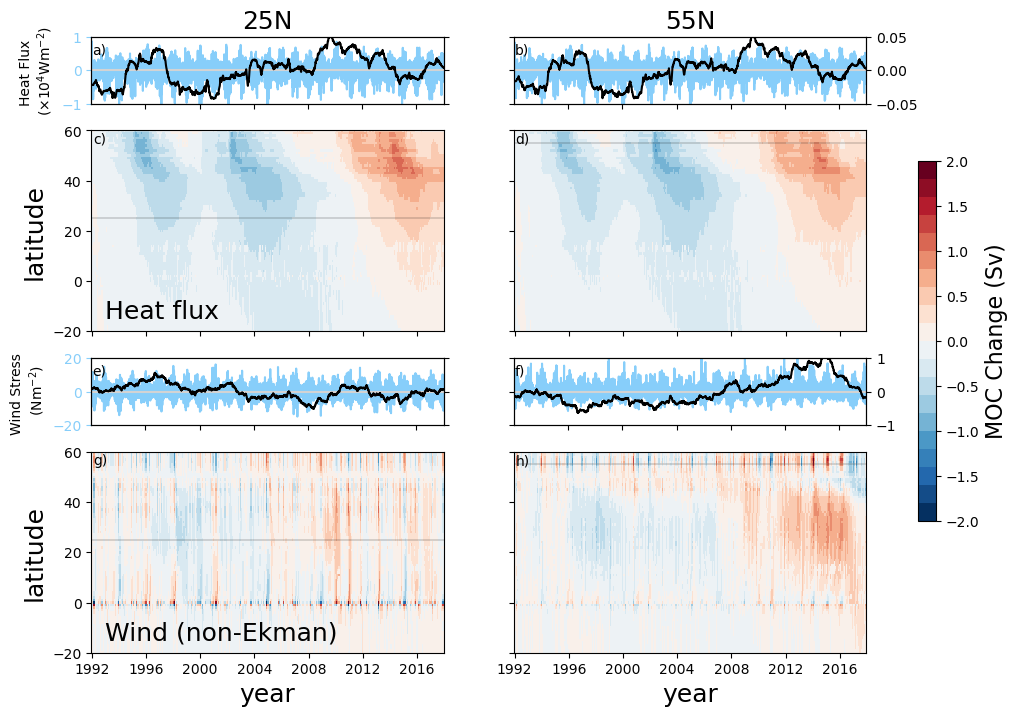

In [11]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a GridSpec with 4 rows and 2 columns
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(4, 2, height_ratios=[1, 3, 1, 3])

# Create a 4x2 array for the axes
ax = np.empty((4, 2), dtype=object)

for i in range(4):
    ax[i,0] = fig.add_subplot(gs[i,0])
    ax[i,1] = fig.add_subplot(gs[i,1])

[a.set_xticklabels([]) for a in ax[:-1,:].flatten()]


# Hovmöllers
CMAP=plt.cm.get_cmap('RdBu_r',20).__copy__();CMAP.set_bad('k')
NM1=1;VLIM=2
p=ax[1,0].pcolormesh(t,lat,sig.fftconvolve(MOC25_hflux-MOCv4_cntrl,\
                                           np.ones((NM1,1))/NM1,mode='same'),cmap=CMAP,shading='nearest',vmin=-VLIM,vmax=VLIM);#fig.colorbar(p,ax=ax[0,0])
p=ax[1,1].pcolormesh(t,lat,sig.fftconvolve(MOC55_hflux-MOCv4_cntrl,\
                                           np.ones((NM1,1))/NM1,mode='same'),cmap=CMAP,shading='nearest',vmin=-VLIM,vmax=VLIM);#fig.colorbar(p,ax=ax[0,3])

p=ax[3,0].pcolormesh(t,lat,sig.fftconvolve((MOC25_tauxy-MOCv4_cntrl)-(EKM25_tauxy-EKMv4_cntrl),\
                                           np.ones((NM1,1))/NM1,mode='same'),cmap=CMAP,shading='nearest',vmin=-VLIM,vmax=VLIM);#fig.colorbar(p,ax=ax[1,0])
p=ax[3,1].pcolormesh(t,lat,sig.fftconvolve((MOC55_tauxy-MOCv4_cntrl)-(EKM55_tauxy-EKMv4_cntrl),\
                                           np.ones((NM1,1))/NM1,mode='same'),cmap=CMAP,shading='nearest',vmin=-VLIM,vmax=VLIM);#fig.colorbar(p,ax=ax[1,3])

ax[1,0].axhline(25,color='k',linewidth=0.2)
ax[1,1].axhline(55,color='k',linewidth=0.2)
ax[3,0].axhline(25,color='k',linewidth=0.2)
ax[3,1].axhline(55,color='k',linewidth=0.2)
# DPC time series (multiply by singular values - middle output in svd? - to get back to normal)
# nm=36
lpfc='k'
npfc='lightskyblue'
N=1
ax[0,0].plot(t_dpc,1e-4*STD25_hflux*sig.fftconvolve(DPC25_hflux,np.ones(N)/(N),mode='same'),color=npfc)
ax[0,1].plot(t_dpc,1e-4*STD55_hflux*sig.fftconvolve(DPC55_hflux,np.ones(N)/(N),mode='same'),color=npfc)
ax[2,0].plot(t_dpc,STD25_tauxy*sig.fftconvolve(DPC25_tauxy,np.ones(N)/(N),mode='same'),color=npfc)
ax[2,1].plot(t_dpc,STD55_tauxy*sig.fftconvolve(DPC55_tauxy,np.ones(N)/(N),mode='same'),color=npfc)


N=4*365*3
axb=ax.copy()
for i in [0,2]:
    axb[i,0]=ax[i,0].twinx()
    axb[i,1]=ax[i,1].twinx()
axb[0,0].plot(t_dpc,1e-4*STD25_hflux*sig.fftconvolve(DPC25_hflux,np.ones(N)/(N),mode='same'),color=lpfc)
axb[0,1].plot(t_dpc,1e-4*STD55_hflux*sig.fftconvolve(DPC55_hflux,np.ones(N)/(N),mode='same'),color=lpfc)
axb[2,0].plot(t_dpc,STD25_tauxy*sig.fftconvolve(DPC25_tauxy,np.ones(N)/(N),mode='same'),color=lpfc)
axb[2,1].plot(t_dpc,STD55_tauxy*sig.fftconvolve(DPC55_tauxy,np.ones(N)/(N),mode='same'),color=lpfc)

[A.set_ylim(-1,1) for A in  ax[0,[0,1]]];
[A.tick_params(axis='y', colors='lightskyblue') for A in ax[[0,2],0]];

[A.set_ylim(-0.05,0.05) for A in axb[0,[0,1]]]
[A.set_ylim(-20 ,20 ) for A in  ax[2,[0,1]]]
[A.set_ylim(-1  ,1  ) for A in axb[2,[0,1]]]

[A.set_ylim(-20,60) for A in ax[[1,3],:].flatten()]

[A.set_xlabel('year',fontsize=18) for A in ax[-1,:]]
[A.set_xticklabels([]) for A in ax[0,:].flatten()]
[A.set_yticklabels([]) for A in ax[:,-1].flatten()]
[A.set_yticklabels([]) for A in axb[[0,2],0]]
cbax=fig.add_axes([0.95,0.25,0.02,0.5])
cbax.set_visible(False)
cb=fig.colorbar(p,ax=cbax,fraction=0.9)
cb.ax.set_ylabel('MOC Change (Sv)',fontsize=16)

[a.axhline(0,color='lightgrey') for a in ax[[0,2],:].flatten()]
[a.set_xlim(t_dpc[0],t_dpc[-1]) for a in ax[[0,2],:].flatten()]

ax[0,0].set_title('25N',fontsize=18)
ax[0,1].set_title('55N',fontsize=18)
ax[1,0].text(t.values[12],-15,'Heat flux',fontsize=18)
ax[3,0].text(t.values[12],-15,'Wind (non-Ekman)',fontsize=18)

[A.set_ylabel('latitude',fontsize=18) for A in ax[[1,3],0]]
ax[0,0].set_ylabel('Heat Flux \n'+r'($\times10^{4}$Wm$^{-2}$)')
ax[2,0].set_ylabel('Wind Stress \n'+r' (Nm$^{-2}$)')

[ax[0,i].text(t_dpc[120],0.5,['a)','b)'][i]) for i in range(2)]
[ax[2,i].text(t_dpc[120],10,['e)','f)'][i]) for i in range(2)]

[ax[1,i].text(t_dpc[120],55,['c)','d)'][i]) for i in range(2)]
[ax[3,i].text(t_dpc[120],55,['g)','h)'][i]) for i in range(2)]


# [a.yaxis.tick_right() for a in ax[[0,2],1].flatten()]
# [a.yaxis.set_label_position("right") for a in ax[[0,2],1].flatten()]
fig.show()


In [12]:
fig.savefig('figures/figure_3.png',bbox_inches='tight')

## Figure 4: Low-pass filter plots

In [13]:
%%time
NMmax=120 #Maximum number of months to use as a low-pass window
ze=np.zeros(( NMmax , MOCv4_cntrl.shape[0]))
LPM55_hflux=ze.copy();LPM25_hflux=ze.copy();
LPM55_tauxy=ze.copy();LPM25_tauxy=ze.copy();
LPMv4_cntrl    =ze.copy();

# Loop over the number of months and take the variance of the MOC time series with a boxcar of that many months applied
for i in np.arange(NMmax):
    NM=np.arange(1,NMmax+1)[i]
    LPMv4_cntrl[i,:]=np.nanvar(sig.fftconvolve(MOCv4_cntrl[:,:],np.ones((1,NM))/(NM),mode='valid'),axis=1)
    
    LPM55_hflux[i,:]=np.nanvar(sig.fftconvolve(MOC55_hflux[:,:],np.ones((1,NM))/(NM),mode='valid'),axis=1)
    LPM25_hflux[i,:]=np.nanvar(sig.fftconvolve(MOC25_hflux[:,:],np.ones((1,NM))/(NM),mode='valid'),axis=1)
    
    LPM55_tauxy[i,:]=np.nanvar(sig.fftconvolve(MOC55_tauxy[:,:],np.ones((1,NM))/(NM),mode='valid'),axis=1)
    LPM25_tauxy[i,:]=np.nanvar(sig.fftconvolve(MOC25_tauxy[:,:],np.ones((1,NM))/(NM),mode='valid'),axis=1)
    

CPU times: user 2.19 s, sys: 43.6 ms, total: 2.24 s
Wall time: 2.54 s


/glade/derecho/scratch/dafydd/tmp/ipykernel_25922/3742677906.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  CMAP=plt.cm.get_cmap('RdBu_r',20).__copy__();CMAP.set_bad('k')


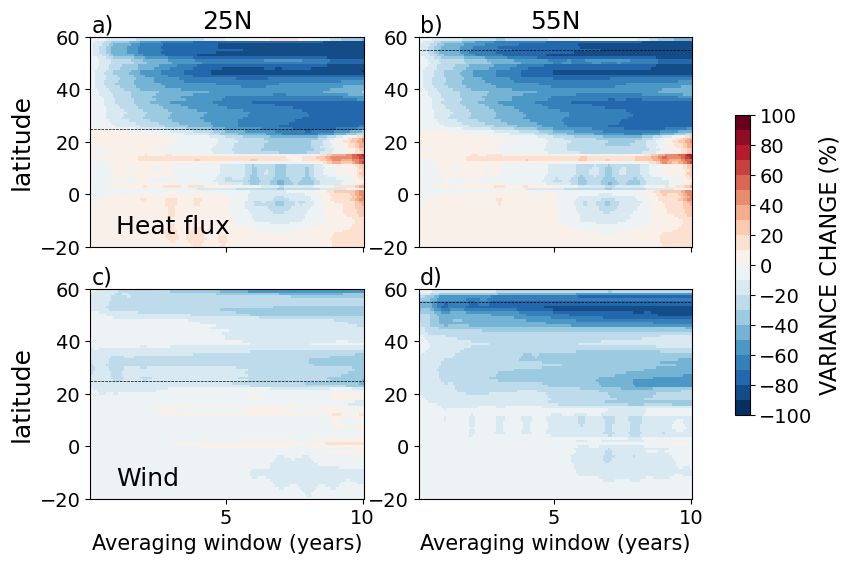

In [14]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

fig,ax=plt.subplots(2,3)
CMAP=plt.cm.get_cmap('RdBu_r',20).__copy__();CMAP.set_bad('k')
avgs=(np.arange(NMmax)+1)/12.
p=ax[0,0].pcolormesh(avgs,lat,(100*(LPM25_hflux-LPMv4_cntrl)/LPMv4_cntrl).T,cmap=CMAP,shading='nearest',vmin=-100,vmax=100);#fig.colorbar(p,ax=ax[0,0])
p=ax[0,1].pcolormesh(avgs,lat,(100*(LPM55_hflux-LPMv4_cntrl)/LPMv4_cntrl).T,cmap=CMAP,shading='nearest',vmin=-100,vmax=100);#

p=ax[1,0].pcolormesh(avgs,lat,(100*(LPM25_tauxy-LPMv4_cntrl)/LPMv4_cntrl).T,cmap=CMAP,shading='nearest',vmin=-100,vmax=100);#fig.colorbar(p,ax=ax[0,0])
p=ax[1,1].pcolormesh(avgs,lat,(100*(LPM55_tauxy-LPMv4_cntrl)/LPMv4_cntrl).T,cmap=CMAP,shading='nearest',vmin=-100,vmax=100);#

[A.set_xlabel('Averaging window (years)',fontsize=15) for A in ax[1,:]]
[A.tick_params(axis='both',labelsize=14) for A in ax.flatten()]
[A.set_ylim(-20,60) for A in ax.flatten()]
[A.axhline(25,color='k',linestyle='--',linewidth=0.5) for A in ax[:,0]]
[A.axhline(55,color='k',linestyle='--',linewidth=0.5) for A in ax[:,1]]
ax[0,0].set_title('25N',fontsize=18)
ax[0,1].set_title('55N',fontsize=18)
[A.set_ylabel('latitude',fontsize=18) for A in ax[:,0]]
ax[0,0].text(1,-15,'Heat flux',fontsize=18)
ax[1,0].text(1,-15,'Wind',fontsize=18)
[A.set_xticklabels([]) for A in ax[0,:]]
# colorbar
[A.set_visible(False) for A in ax[:,-1]]
[ax.flatten()[i].text(avgs[0],62,['a)','b)','_','c)','d)','_'][i],fontsize=16) for i in range(len(ax.flatten()))]
cbax=fig.add_axes([0.66,0.25,0.02,0.5])
cb=fig.colorbar(p,ax=cbax,fraction=0.9,ticks=np.arange(-100,120,20))
cb.ax.set_ylabel('VARIANCE CHANGE (%)',fontsize=16)
cb.ax.tick_params(labelsize=14)
cbax.set_visible(False)
fig.set_size_inches(12,6)
fig.savefig('figures/figure_4.png',bbox_inches='tight')

In [15]:
fig.savefig('figures/figure_4.png',bbox_inches='tight')

# Figure 5: perturbed run maps and Hovmöller plots

In [2]:
eccorundir='/wherever/you/set/up/perturbed_forcing_runs/'
eccorundir='/glade/work/dafydd/ECCOv4r4_runs/perturbed_FF_runs/'

In [3]:
# Load DH anomalies
DHDS25_hflux=xr.open_dataset(eccorundir+'DPC25_hflux/SSH.nc')
DHDS55_hflux=xr.open_dataset(eccorundir+'DPC55_hflux/SSH.nc')

DHDS25_tauxy=xr.open_dataset(eccorundir+'DPC25_tauxy/SSH.nc')
DHDS55_tauxy=xr.open_dataset(eccorundir+'DPC55_tauxy/SSH.nc')

DHDSv4_cntrl=xr.open_dataset(eccorundir+'CONTROL/SSH.nc')


In [4]:
# %%time
DH55hf=(DHDS55_hflux.SSH - DHDSv4_cntrl.SSH).values.reshape(-1,13*90*90)[:,Ti]
DH25hf=(DHDS25_hflux.SSH - DHDSv4_cntrl.SSH).values.reshape(-1,13*90*90)[:,Ti]
DH25uv=(DHDS25_tauxy.SSH - DHDSv4_cntrl.SSH).values.reshape(-1,13*90*90)[:,Ti]
DH55uv=(DHDS55_tauxy.SSH - DHDSv4_cntrl.SSH).values.reshape(-1,13*90*90)[:,Ti]

In [5]:
eccorundir='/wherever/you/set/up/modified_forcing_runs/'
eccorundir='/glade/work/dafydd/ECCOv4r4_runs/perturbed_FF_runs/'

MOC25_hflux=    xr.open_dataset(eccorundir+'DPC25_hflux/atlantic_moc_diagnostics.nc').moc.T
MOC55_hflux=    xr.open_dataset(eccorundir+'DPC55_hflux/atlantic_moc_diagnostics.nc').moc.T

MOC25_tauxy=    xr.open_dataset(eccorundir+'DPC25_tauxy/atlantic_moc_diagnostics.nc').moc.T
MOC55_tauxy=    xr.open_dataset(eccorundir+'DPC55_tauxy/atlantic_moc_diagnostics.nc').moc.T

EKM25_tauxy=1e6*xr.open_dataset(eccorundir+'DPC25_tauxy/atlantic_moc_diagnostics.nc').ekman.T
EKM55_tauxy=1e6*xr.open_dataset(eccorundir+'DPC55_tauxy/atlantic_moc_diagnostics.nc').ekman.T

MOCv4_cntrl=    xr.open_dataset(eccorundir+'CONTROL/atlantic_moc_diagnostics.nc').moc.T
EKMv4_cntrl=1e6*xr.open_dataset(eccorundir+'CONTROL/atlantic_moc_diagnostics.nc').ekman.T

(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)


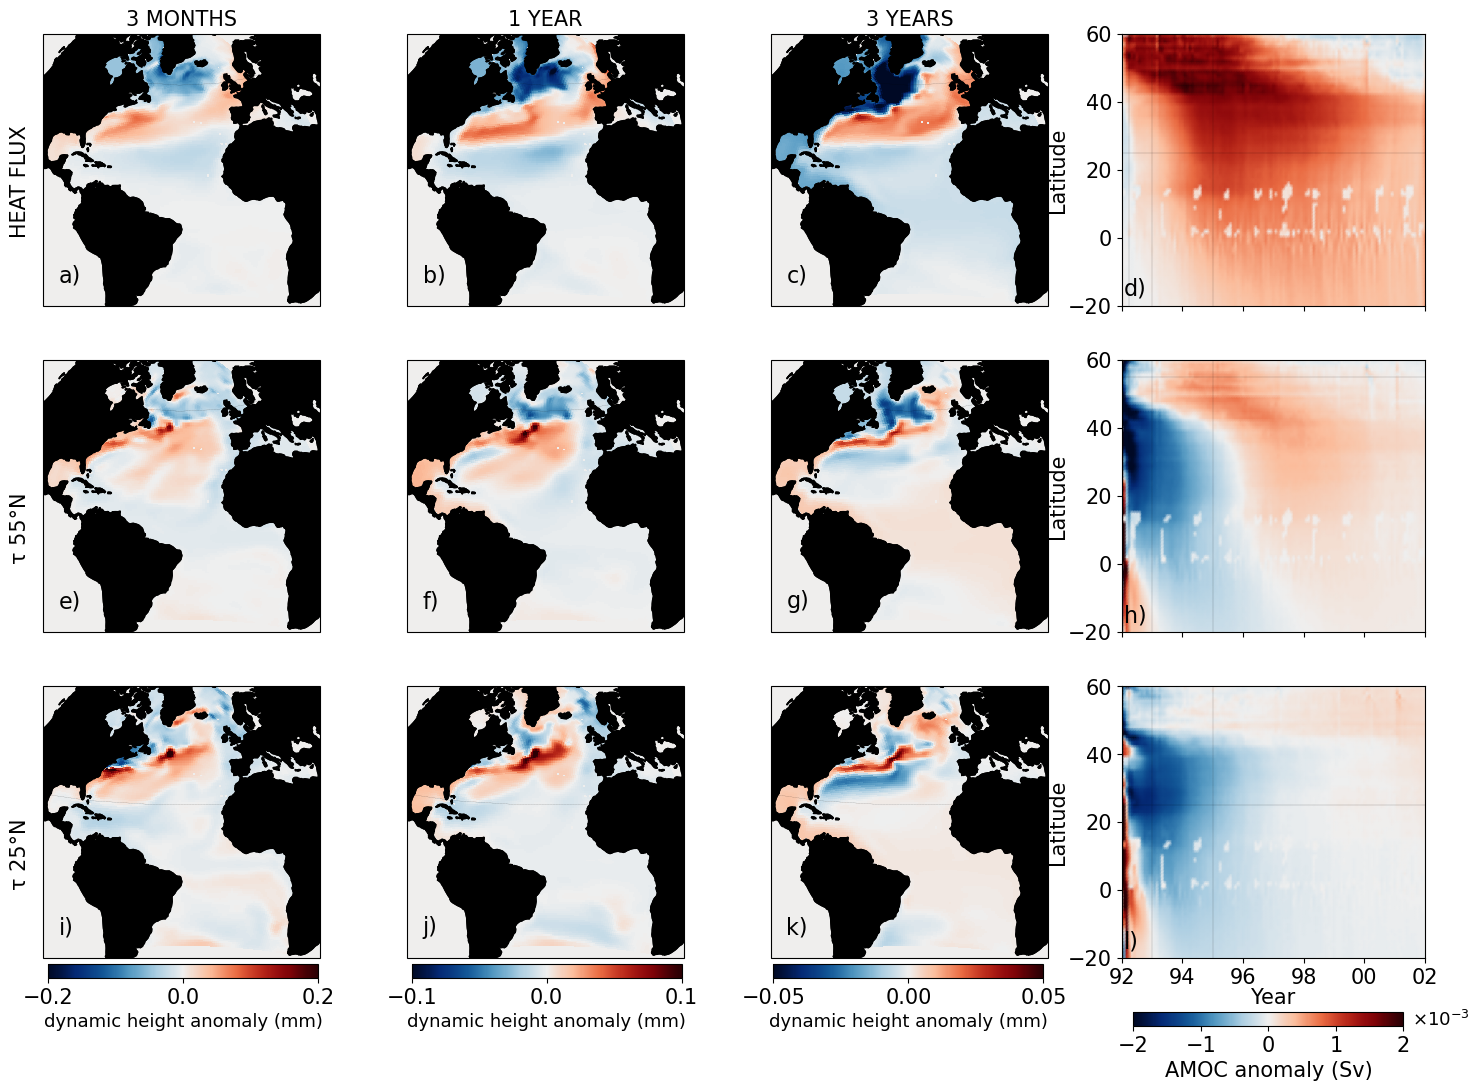

In [21]:
fig,ax=plt.subplots(3,4)
###############################################
#Sharpen the colormap
from matplotlib.colors import ListedColormap

# Define the base colormap and the number of colors
base_cmap = plt.get_cmap('RdBu_r')
N = 256  # Number of points in the colormap
colors = base_cmap(np.linspace(0, 1, N))
midcolor=colors[128]**2
CMAP = ListedColormap(colors**2)
CMAP.set_bad('k')
###############################################

VLIMS=[0.2,0.1,0.05]
for i in range(3):
    ti=[3,12,36][i]
    VLIM=VLIMS[i]
    p0,AX=unpack_and_map(DH55hf[ti,:]*1e3,ax=ax[0,i],vmin=-VLIM,vmax=VLIM,cmap=CMAP);ax[0,i]=AX;#fig.colorbar(p,ax=AX);
    p1,AX=unpack_and_map(DH55uv[ti,:]*1e3,ax=ax[1,i],vmin=-VLIM,vmax=VLIM,cmap=CMAP);ax[1,i]=AX;#fig.colorbar(p,ax=AX)
    p2,AX=unpack_and_map(DH25uv[ti,:]*1e3,ax=ax[2,i],vmin=-VLIM,vmax=VLIM,cmap=CMAP);ax[2,i]=AX;#fig.colorbar(p,ax=AX)
[a.plot([-100,100],[55,55],transform=ccrs.PlateCarree(),color='k',linestyle='--',linewidth=0.1) for a in ax[:2,:3].flatten()]
[a.plot([-100,100],[25,25],transform=ccrs.PlateCarree(),color='k',linestyle='--',linewidth=0.1) for a in ax[2,:3].flatten()]

cbypos=0.09
cbhght=0.15
cbwdth=0.1
cbax=fig.add_axes([0.135,cbypos,cbhght,cbwdth])
cbax.set_visible(False)
p00=cbax.pcolormesh(np.random.randn(3,3),vmin=-VLIMS[0],vmax=VLIMS[0],cmap=CMAP)
cb=fig.colorbar(p00,ax=cbax,orientation='horizontal')
cb.set_label(r'dynamic height anomaly (mm)',fontsize=13)
cb.ax.tick_params(axis='both', which='major', labelsize=15)
cb.ax.set_xticks([-VLIMS[0],0,VLIMS[0]])

cbax=fig.add_axes([0.337,cbypos,cbhght,cbwdth])
p11=cbax.pcolormesh(np.random.randn(3,3),vmin=-VLIMS[1],vmax=VLIMS[1],cmap=CMAP)
cbax.set_visible(False)
cb=fig.colorbar(p11,ax=cbax,orientation='horizontal')
cb.set_label(r'dynamic height anomaly (mm)',fontsize=13)
cb.ax.tick_params(axis='both', which='major', labelsize=15)
cb.ax.set_xticks([-VLIMS[1],0,VLIMS[1]])

cbax=fig.add_axes([0.538,cbypos,cbhght,cbwdth])
p22=cbax.pcolormesh(np.random.randn(3,3),vmin=-VLIMS[2],vmax=VLIMS[2],cmap=CMAP)
cbax.set_visible(False)
cb=fig.colorbar(p22,ax=cbax,orientation='horizontal')
cb.set_label(r'dynamic height anomaly (mm)',fontsize=13)
cb.ax.tick_params(axis='both', which='major', labelsize=15)
cb.ax.set_xticks([-VLIMS[2],0,VLIMS[2]])

VLIM=2
tmoc=MOCv4_cntrl.time.values
p=ax[0,-1].pcolormesh(tmoc,MOCv4_cntrl.lat,1e3*(MOC55_hflux-MOCv4_cntrl),vmin=-VLIM,vmax=VLIM,cmap=CMAP,shading='gouraud')
p=ax[1,-1].pcolormesh(tmoc,MOCv4_cntrl.lat,1e3*(MOC55_tauxy-MOCv4_cntrl),vmin=-VLIM,vmax=VLIM,cmap=CMAP,shading='gouraud')
p=ax[2,-1].pcolormesh(tmoc,MOCv4_cntrl.lat,1e3*(MOC25_tauxy-MOCv4_cntrl),vmin=-VLIM,vmax=VLIM,cmap=CMAP,shading='gouraud')
[a.set_xlim(MOCv4_cntrl.time.values[0],MOCv4_cntrl.time.values[120]) for a in ax[:,-1]]
[a.set_ylim(-20,60) for a in ax[:,-1]]
[a.xaxis.set_major_formatter(mdates.DateFormatter('%y')) for a in ax[:,-1]]


ax[0,-1].axhline(25,linewidth=0.1,color='k')
ax[1,-1].axhline(55,linewidth=0.1,color='k')
ax[2,-1].axhline(25,linewidth=0.1,color='k')
[[ax.flatten()[i].axvline(tmoc[ti],linewidth=0.1,color='k') for i in [3,7,11]] for ti in [3,12,36]]

[a.set_ylabel('Latitude',fontsize=15,labelpad=0) for a in ax[:,-1]]
[a.set_xticks([tmoc[i] for i in [0,24,48,72,96,120]]) for a in ax[:,-1]]
[a.set_xticklabels([]) for a in ax[:-1,-1]]

ax[-1,-1].set_xlabel('Year',fontsize=15,labelpad=0)
[a.tick_params(axis='both', which='major', labelsize=15) for a in ax.flatten()]

cbax=fig.add_axes([0.738,0.05,0.15,0.1])
p22=cbax.pcolormesh(np.random.randn(3,3),vmin=-VLIM,vmax=VLIM,cmap=CMAP)
cbax.set_visible(False)
cb=fig.colorbar(p22,ax=cbax,orientation='horizontal')
cb.set_label('AMOC anomaly (Sv)',fontsize=15)
cb.ax.tick_params(axis='both', which='major', labelsize=15)
ax[-1,-1].text(MOCv4_cntrl.time.values[115],-40,r'$\times10^{-3}$',fontsize=13)

[ax[i,0].text(-8e6,[-1e6,-1e6,-1e6][i],['HEAT FLUX','τ 55°N','τ 25°N'][i],rotation=90,fontsize=15) for i in range(3)]
# fig.colorbar(p,ax=ax[0,-1])
ax[0,0].set_title('3 MONTHS',fontsize=15)
ax[0,1].set_title('1 YEAR',fontsize=15)
ax[0,2].set_title('3 YEARS',fontsize=15)

[ax.flatten()[i].text(-5.75e6,-3.25e6,['a)','b)','c)','d)','e)','f)','g)','h)','i)','j)','k)','l)'][i],fontsize=16) for i in [0,1,2,4,5,6,8,9,10]]
[ax.flatten()[i].text(MOCv4_cntrl.time.values[1],-17,['a)','b)','c)','d)','e)','f)','g)','h)','i)','j)','k)','l)'][i],fontsize=16) for i in [3,7,11]]
[ax.flatten()[i].set_facecolor(midcolor) for i in [0,1,2,4,5,6,8,9,10]]

fig.set_size_inches(18,12)


In [22]:
fig.savefig('figures/figure_5.png',bbox_inches='tight')

# SUPPLEMENTARY FIGURES

# SF1: NAO and EAP regression maps

In [23]:
%%time 
slp_COV=np.load('/glade/work/dafydd/patterns_and_decompositions/apressure_COV.npy')
slp_X  =np.load('/glade/work/dafydd/patterns_and_decompositions/apressure_X.npy')
slp_V,slp_Q=la.eigsh(slp_COV,k=4)

NAO_t=slp_X.dot(slp_Q[:,-1]);NAO_t=NAO_t/np.linalg.norm(NAO_t)
EAP_t=slp_X.dot(slp_Q[:,-2]);EAP_t=EAP_t/np.linalg.norm(EAP_t)
SCN_t=slp_X.dot(slp_Q[:,-3]);SCN_t=SCN_t/np.linalg.norm(SCN_t)

CPU times: user 4 s, sys: 16.5 s, total: 20.5 s
Wall time: 29.5 s


In [24]:
%%time

hflux_X    =np.load('/glade/work/dafydd/patterns_and_decompositions/hflux_X.npy')
uvstress_X =np.load('/glade/work/dafydd/patterns_and_decompositions/uvstress_X.npy')

NAO_uv=uvstress_X[:-4,:].T.dot(NAO_t);NAO_uv=NAO_uv/np.linalg.norm(NAO_uv)
EAP_uv=uvstress_X[:-4,:].T.dot(EAP_t);EAP_uv=EAP_uv/np.linalg.norm(EAP_uv)
SCN_uv=uvstress_X[:-4,:].T.dot(SCN_t);SCN_uv=SCN_uv/np.linalg.norm(SCN_uv)

NAO_hf=hflux_X[:-4,:].T.dot(NAO_t);NAO_hf=NAO_hf/np.linalg.norm(NAO_hf)
EAP_hf=hflux_X[:-4,:].T.dot(EAP_t);EAP_hf=EAP_hf/np.linalg.norm(EAP_hf)
SCN_hf=hflux_X[:-4,:].T.dot(SCN_t);SCN_hf=SCN_hf/np.linalg.norm(SCN_hf)

CPU times: user 7.29 s, sys: 7min 45s, total: 7min 52s
Wall time: 8min 46s


(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)
(13, 90, 90)


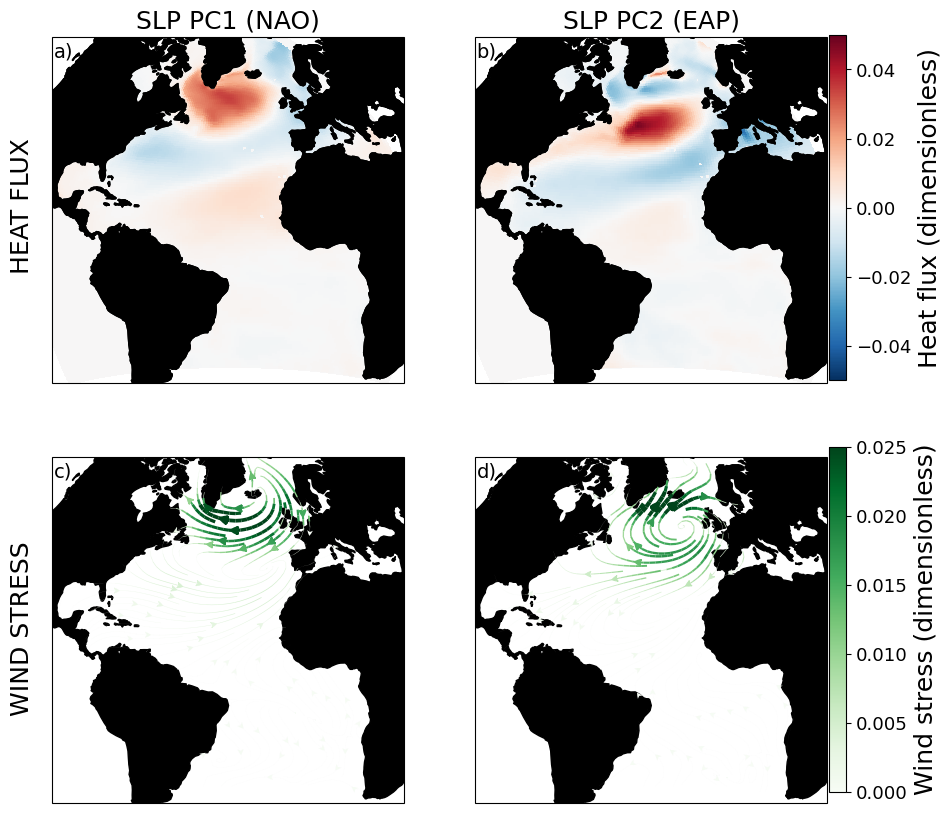

In [25]:
fig,ax=plt.subplots(2,2)
VLIMhf=0.05
VLIMuv=0.025
p1,AX=unpack_and_map(-NAO_hf,ax=ax[0,0],vmin=-VLIMhf,vmax=VLIMhf,cmap='RdBu_r');ax[0,0]=AX
p2,AX=unpack_and_map(EAP_hf,ax=ax[0,1],vmin=-VLIMhf,vmax=VLIMhf,cmap='RdBu_r');ax[0,1]=AX
p3,AX=atlstream(-NAO_uv,ax=ax[1,0],widthfactor=4,ss=1,density=4,arrowsize=1.,arrowstyle='fancy',cmap='Greens',vmin=0,vmax=VLIMuv);ax[1,0]=AX
p4,AX=atlstream(EAP_uv,ax=ax[1,1],widthfactor=4,ss=1,density=4,arrowsize=1.,arrowstyle='fancy',cmap='Greens',vmin=0,vmax=VLIMuv);ax[1,1]=AX
# fig.suptitle('Regression of leading SLP PCs')
ax[0,0].text(-8e6,-.2e6,'HEAT FLUX',rotation=90,fontsize=18)
ax[1,0].text(-8e6,-1e6,'WIND STRESS',rotation=90,fontsize=18)
ax[0,0].set_title('SLP PC1 (NAO)',fontsize=18)
ax[0,1].set_title('SLP PC2 (EAP)',fontsize=18)

cbax=fig.add_axes([0.90,0.123,0.02,0.345])
cb=fig.colorbar(p3.lines,ax=cbax,fraction=0.9)
cbax.set_visible(False)
cb.ax.tick_params(labelsize=13)
cb.ax.set_ylabel('Wind stress (dimensionless)',fontsize=18);

cbax=fig.add_axes([0.90,0.535,0.02,0.345])
cb=fig.colorbar(p1,ax=cbax,fraction=0.9)
cb.ax.tick_params(labelsize=13)
cbax.set_visible(False)
cb.ax.set_ylabel('Heat flux (dimensionless)',fontsize=18);

[ax.flatten()[i].text(-6.4e6,7.5e6,['a)','b)','c)','d)'][i],fontsize=14) for i in range(4)]

fig.set_size_inches(10,10)

In [26]:
fig.savefig('figures/supplementary_figure_1.png',bbox_inches='tight')

# SF2: Western boundary density anomalies

In [27]:
# Load density anomalies
eccorundir='/glade/work/dafydd/ECCOv4r4_runs/perturbed_FF_runs/'
ρDS25_hflux=xr.open_dataset(eccorundir+'DPC25_hflux/RHOAnoma.nc')
ρDS55_hflux=xr.open_dataset(eccorundir+'DPC55_hflux/RHOAnoma.nc')

ρDS25_tauxy=xr.open_dataset(eccorundir+'DPC25_tauxy/RHOAnoma.nc')
ρDS55_tauxy=xr.open_dataset(eccorundir+'DPC55_tauxy/RHOAnoma.nc')

ρDSv4_cntrl=xr.open_dataset(eccorundir+'CONTROL/RHOAnoma.nc')

lonatl=np.hstack([np.rot90(GDS.XC.isel(tile=10)),GDS.XC.isel(tile=2)])
latatl=np.hstack([np.rot90(GDS.YC.isel(tile=10)),GDS.YC.isel(tile=2)])

def atlcat(X):
    X10=np.rot90(X.isel(tile=10),axes=(-2,-1))
    X2=X.isel(tile=2)
    return np.concatenate([X10,X2],axis=-1)

X=atlcat(ρDS55_hflux.RHOAnoma)-atlcat(ρDSv4_cntrl.RHOAnoma)


In [28]:
#OG
NP=3
atlmsk=ecco.get_basin_mask(['atl'],mask=GDS.hFacC,less_output=True);
wbccs=atlmsk.isel(tile=[10,11]).cumsum('j').values
wbccs[wbccs>NP]=0
wbccs[wbccs>0]=1
wbcmsk=np.zeros((50,13,90,90))
wbcmsk[:,10:12,:,:]=wbccs
# plt.pcolormesh(wbcmsk[0,10,:]+GDS.hFacC.isel(k=0,tile=10))

In [36]:
%%time
zidx=25
loni,lati,WBDv4_cntrl=interp_to_latlon_timevarying(GDS.XC.values,GDS.YC.values,(ρDSv4_cntrl.RHOAnoma*wbcmsk).isel(k=zidx).values)#*GDS.drF.values[None,:,None,None,None]).sum(axis=1))

loni,lati,WBD55_hflux=interp_to_latlon_timevarying(GDS.XC.values,GDS.YC.values,((ρDS55_hflux.RHOAnoma-ρDSv4_cntrl.RHOAnoma)*wbcmsk).isel(k=zidx).values)#*GDS.drF.values[None,:,None,None,None]).sum(axis=1))
loni,lati,WBD25_hflux=interp_to_latlon_timevarying(GDS.XC.values,GDS.YC.values,((ρDS25_hflux.RHOAnoma-ρDSv4_cntrl.RHOAnoma)*wbcmsk).isel(k=zidx).values)#*GDS.drF.values[None,:,None,None,None]).sum(axis=1))
loni,lati,WBD25_tauxy=interp_to_latlon_timevarying(GDS.XC.values,GDS.YC.values,((ρDS25_tauxy.RHOAnoma-ρDSv4_cntrl.RHOAnoma)*wbcmsk).isel(k=zidx).values)#*GDS.drF.values[None,:,None,None,None]).sum(axis=1))
loni,lati,WBD55_tauxy=interp_to_latlon_timevarying(GDS.XC.values,GDS.YC.values,((ρDS55_tauxy.RHOAnoma-ρDSv4_cntrl.RHOAnoma)*wbcmsk).isel(k=zidx).values)#*GDS.drF.values[None,:,None,None,None]).sum(axis=1))

CPU times: user 21.4 s, sys: 54.2 s, total: 1min 15s
Wall time: 1min 32s


/glade/derecho/scratch/dafydd/tmp/ipykernel_25922/2469234716.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  CMAP=plt.cm.get_cmap('RdBu_r').__copy__()


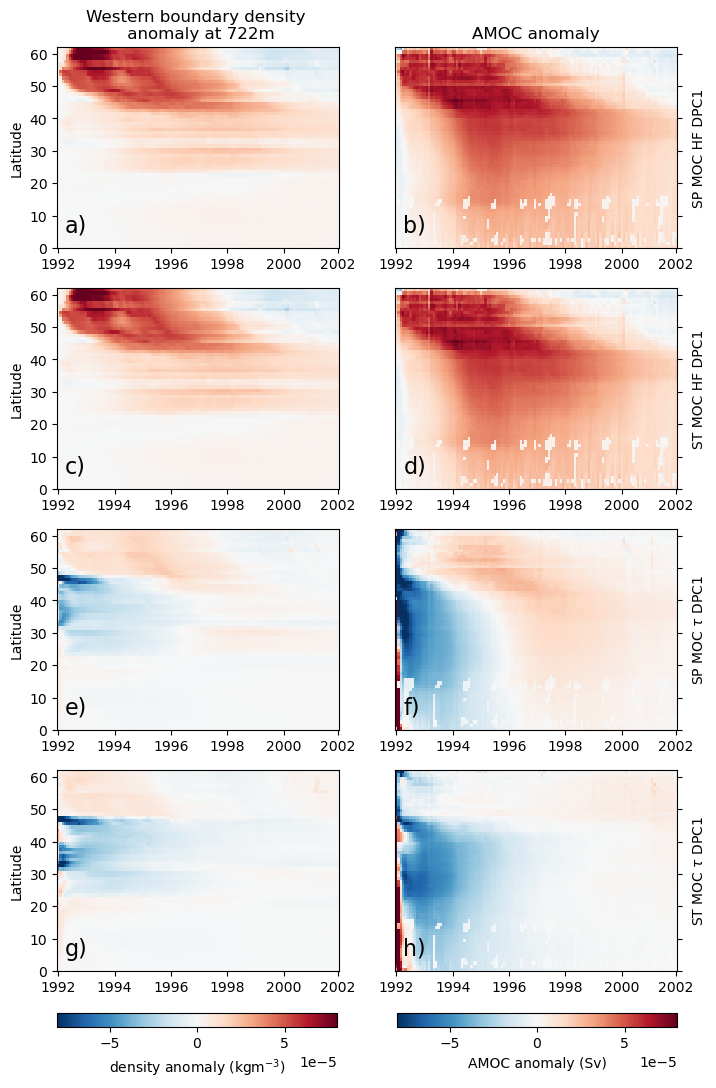

In [37]:
fig,ax=plt.subplots(4,2)
t=MOC25_tauxy.time[:120]
CMAP=plt.cm.get_cmap('RdBu_r').__copy__()
CMAP.set_bad('k')
VLIM=8e-5
p00=ax[0,0].pcolormesh(t,lati,(WBD55_hflux).sum(axis=1)[:120].T/3,vmin=-VLIM,vmax=VLIM,cmap=CMAP)
p10=ax[1,0].pcolormesh(t,lati,(WBD25_hflux).sum(axis=1)[:120].T/3,vmin=-VLIM,vmax=VLIM,cmap=CMAP)
p20=ax[2,0].pcolormesh(t,lati,(WBD55_tauxy).sum(axis=1)[:120].T/3,vmin=-VLIM,vmax=VLIM,cmap=CMAP)
p30=ax[3,0].pcolormesh(t,lati,(WBD25_tauxy).sum(axis=1)[:120].T/3,vmin=-VLIM,vmax=VLIM,cmap=CMAP)

cbax=fig.add_axes([0.125,0.03,0.35,0.05])
cb=fig.colorbar(p00,ax=cbax,fraction=0.9,orientation='horizontal')
cb.ax.set_xlabel(r'density anomaly (kgm$^{-3}$)')
cbax.set_visible(False)

VLIM=2e-3
p01=ax[0,1].pcolormesh(t,lati,(MOC55_hflux-MOCv4_cntrl)[:,:120],vmin=-VLIM,vmax=VLIM,cmap=CMAP)
p11=ax[1,1].pcolormesh(t,lati,(MOC25_hflux-MOCv4_cntrl)[:,:120],vmin=-VLIM,vmax=VLIM,cmap=CMAP)
p21=ax[2,1].pcolormesh(t,lati,(MOC55_tauxy-MOCv4_cntrl)[:,:120],vmin=-VLIM,vmax=VLIM,cmap=CMAP)
p31=ax[3,1].pcolormesh(t,lati,(MOC25_tauxy-MOCv4_cntrl)[:,:120],vmin=-VLIM,vmax=VLIM,cmap=CMAP)

cbax=fig.add_axes([0.55,0.03,0.35,0.05])
cb=fig.colorbar(p10,ax=cbax,fraction=0.9,orientation='horizontal')
cb.ax.set_xlabel('AMOC anomaly (Sv)')
cbax.set_visible(False)

ax[0,0].set_title('Western boundary density \n anomaly at 722m')
ax[0,1].set_title('AMOC anomaly')
[ax[i,1].yaxis.tick_right() for i in range(4)]
[ax[i,1].set_ylabel(['SP MOC HF DPC1','ST MOC HF DPC1',r'SP MOC $\tau$ DPC1',r'ST MOC $\tau$ DPC1'][i]) for i in range(4)]
[ax[i,1].yaxis.set_label_position('right') for i in range(4)]
[ax[i,1].set_yticklabels([]) for i in range(4)]
[ax[i,0].set_ylabel('Latitude') for i in range(4)]
[a.set_xticks(np.hstack([t[::24],t[-1]])) for a in ax.flatten()]
[a.set_xticklabels(['1992','1994','1996','1998','2000','2002']) for a in ax.flatten()]
[a.set_ylim(0,62) for a in ax.flatten()]
# fig.colorbar(p00,ax=ax[0,0])

[ax.flatten()[i].text(t[3],5,['a)','b)','c)','d)','e)','f)','g)','h)'][i],fontsize=16) for i in [0,1,2,3,4,5,6,7]]

fig.set_size_inches(8,12)

In [38]:
fig.savefig('figures/supplementary_figure_2.png',bbox_inches='tight')

# SF3: Dynamic Height anomalies

In [7]:
# Load dh anomalies
eccorundir='/glade/work/dafydd/ECCOv4r4_runs/perturbed_FF_runs/'
DHDS25_hflux=xr.open_dataset(eccorundir+'DPC25_hflux/SSH.nc')
DHDS55_hflux=xr.open_dataset(eccorundir+'DPC55_hflux/SSH.nc')

DHDS25_tauxy=xr.open_dataset(eccorundir+'DPC25_tauxy/SSH.nc')
DHDS55_tauxy=xr.open_dataset(eccorundir+'DPC55_tauxy/SSH.nc')

DHDSv4_cntrl=xr.open_dataset(eccorundir+'CONTROL/SSH.nc')


In [8]:
# %%time
DH55hf=(DHDS55_hflux.SSH - DHDSv4_cntrl.SSH).values.reshape(-1,13*90*90)[:,Ti]
DH25hf=(DHDS25_hflux.SSH - DHDSv4_cntrl.SSH).values.reshape(-1,13*90*90)[:,Ti]
DH25uv=(DHDS25_tauxy.SSH - DHDSv4_cntrl.SSH).values.reshape(-1,13*90*90)[:,Ti]
DH55uv=(DHDS55_tauxy.SSH - DHDSv4_cntrl.SSH).values.reshape(-1,13*90*90)[:,Ti]

In [9]:
def latline25(DA):
    DA2=DA.isel(tile=2)
    DA10=DA.isel(tile=10)
    DA25=np.hstack([DA10[:,47:,74].values,DA2[:,15,:23].values])
    lon2=GDS.XC.isel(tile=2)
    lon10=GDS.XC.isel(tile=10)
    lon25=np.hstack([lon10[47:,74].values,lon2[15,:23].values])
    return lon25,DA25
    
def latline55(DA):
    DA2=DA.isel(tile=2)
    DA10=DA.isel(tile=10)
    DA55=np.hstack([DA10[:,69:,33].values,DA2[:,56,:30].values])
    lon2=GDS.XC.isel(tile=2)
    lon10=GDS.XC.isel(tile=10)
    lon55=np.hstack([lon10[69:,33].values,lon2[56,:30].values])
    return lon55,DA55

In [10]:
%%time
lon25,DH55hf25=latline25(DHDS55_hflux.SSH - DHDSv4_cntrl.SSH)
lon25,DH25hf25=latline25(DHDS25_hflux.SSH - DHDSv4_cntrl.SSH)
lon25,DH25uv25=latline25(DHDS25_tauxy.SSH - DHDSv4_cntrl.SSH)
lon25,DH55uv25=latline25(DHDS55_tauxy.SSH - DHDSv4_cntrl.SSH)

lon55,DH55hf55=latline55(DHDS55_hflux.SSH - DHDSv4_cntrl.SSH)
lon55,DH25hf55=latline55(DHDS25_hflux.SSH - DHDSv4_cntrl.SSH)
lon55,DH25uv55=latline55(DHDS25_tauxy.SSH - DHDSv4_cntrl.SSH)
lon55,DH55uv55=latline55(DHDS55_tauxy.SSH - DHDSv4_cntrl.SSH)

CPU times: user 358 ms, sys: 905 ms, total: 1.26 s
Wall time: 1.77 s


/glade/derecho/scratch/dafydd/tmp/ipykernel_25922/3537700682.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  CMAP=plt.cm.get_cmap('RdBu_r').__copy__()


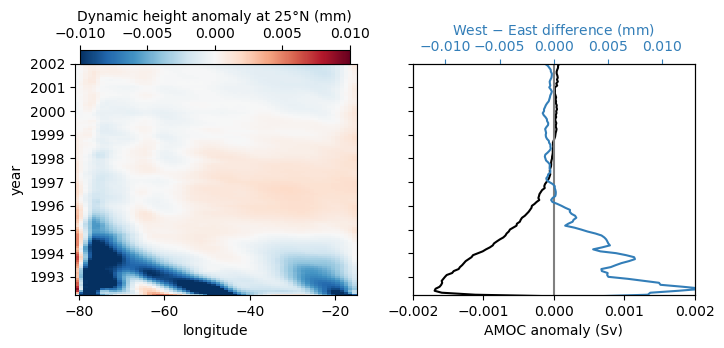

In [43]:
fig,ax=plt.subplots(1,2)
CMAP=plt.cm.get_cmap('RdBu_r').__copy__()
CMAP.set_bad('k')
cline='#337EB8'
t=DHDS25_hflux.time
p=ax[0].pcolormesh(lon25,DHDS25_tauxy.time,1e3*DH25uv25,vmin=-1e-2,vmax=1e-2,cmap=CMAP)
# p=ax[1,0].pcolormesh(lon25,DHDS55_tauxy.time,1e3*DH55uv25,vmin=-1e-2,vmax=1e-2,cmap=CMAP)


ax[1].plot(MOC25_tauxy[55,:]-MOCv4_cntrl[55,:],t,'k')
# ax[1,1].plot(MOC55_tauxy[55,:]-MOCv4_cntrl[55,:],t,'k')

ax[1].set_xlim(-2e-3,2e-3)
ax[1].axvline(color='grey')
ax[1].set_yticklabels([])
# [A.set_xlim(-2e-3,2e-3)  for A in ax[:,1].flatten()]
# [A.axvline(color='grey') for A in ax[:,1].flatten()]
# [A.set_yticklabels([])   for A in ax[:,1].flatten()]


axb=ax[1].twiny()
axb.plot(1e3*(DH25uv25[:,0]-DH25uv25[:,-2]),t,color=cline)
# axb[1,1].plot(1e3*(DH55uv25[:,0]-DH55uv25[:,-2]),t,color=cline)
axb.set_xlim(-1.3e-2,1.3e-2)
# [A.set_xlim(-1.3e-2,1.3e-2)  for A in axb[:,1].flatten()]

# ax[0,1].set_xticklabels([])
# axb[1,1].set_xticklabels([])

[A.set_ylim(MOC25_tauxy.time[3],MOC25_tauxy.time[120]) for A in ax.flatten()]

# ax[0,0].set_xticklabels([])
ax[0].set_xlabel('longitude')
# [A.set_ylabel('year') for A in ax[[0,1],0]]
ax[0].set_ylabel('year')
ax[1].set_xlabel('AMOC anomaly (Sv)')
axb.set_xlabel(r'West $-$ East difference (mm)',color=cline)
axb.tick_params(axis='x', colors=cline)

cbax=fig.add_axes([0.125,0.88,0.35,0.05])
cb=fig.colorbar(p,ax=cbax,fraction=0.9,orientation='horizontal')
cb.ax.set_xlabel('Dynamic height anomaly at 25°N (mm)')
# cb.ax.tick_params(axis='x', which='both', direction='in', labeltop=True, labelbottom=False)
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')
cbax.set_visible(False)

# ax[0,0].text(-80,t[110],'a)')
# ax[1,0].text(-80,t[110],'c)')
# ax[0,1].text(-0.00195,t[110],'b)')
# ax[1,1].text(-0.00195,t[110],'d)')
fig.set_size_inches(8,3)

In [ ]:
fig.savefig('figures/supplementary_figure_3.png',bbox_inches='tight')